### W51-IRS2 B3
Aim: Compare gridders.

In [25]:
fieldname='W51-IRS2'
band='B3'
uid='X18f'
finalselfcal=4

In [26]:
import os
from casatasks import tclean, immath, imregrid, split
from casatools import msmetadata, image, table
tb = table()
msmd = ms = msmetadata()
ia = image()
import shutil

In [27]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import wcs

In [28]:
import reproject

In [29]:
%matplotlib inline
import numpy as np
from astropy import units as u
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)
pl.style.use('dark_background')
pl.rcParams['image.origin'] = 'lower'
import sys
import glob
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/reduction/')
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import spectral_cube
from astropy.visualization import simple_norm

In [30]:
import warnings
import spectral_cube
warnings.simplefilter('ignore', spectral_cube.utils.BeamWarning)
warnings.simplefilter('ignore', spectral_cube.utils.StokesWarning)
warnings.simplefilter('ignore', spectral_cube.utils.PossiblySlowWarning)
warnings.simplefilter('ignore', spectral_cube.utils.WCSWarning)

In [31]:
import os
os.chdir("/orange/adamginsburg/ALMA_IMF/2017.1.01355.L")

In [32]:
origmsname = f"/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_selfcal.ms/"

In [33]:
msmd.open(origmsname)
antennae = ",".join([x for x in msmd.antennanames() if 'CM' not in x])
print(antennae)
msmd.close()

DA41,DA42,DA43,DA44,DA45,DA48,DA49,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA60,DA61,DA62,DA63,DA65,DV01,DV02,DV03,DV04,DV05,DV06,DV07,DV08,DV09,DV10,DV11,DV13,DV14,DV15,DV16,DV17,DV19,DV20,DV22,DV23,DV24,DV25,PM01,PM02,PM03,DA64,DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA50,DA51,DA55,DA56,DA57,DA58,DA61,DA62,DV02,DV03,DV07,DV11,DV12,DV14,DV19,DV21,DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA48,DA49,DA50,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA60,DA61,DA62,DA63,DA65,DV01,DV02,DV03,DV04,DV05,DV07,DV08,DV10,DV11,DV12,DV13,DV14,DV15,DV16,DV17,DV19,DV20,DV21,DV22,DV24,DV25,PM01


True

In [34]:
msname = origmsname.replace(".ms", "_no7m.ms")
split(vis=origmsname, outputvis=msname, antenna=antennae)

tb.open(msname+"/ANTENNA")
colnames = tb.colnames()
data = {cn: tb.getcol(cn) for cn in colnames}
tb.close()

mask7m = data['DISH_DIAMETER'] == 7
rownrs, = np.nonzero(mask7m)
print(rownrs)

tb.open(msname+"/ANTENNA", nomodify=False)
tb.removerows(rownrs)
tb.close()

[]


True

In [35]:
msmd.open(origmsname)
print(msmd.nobservations())
#for ii in range(msmd.nobservations()):
#    print(f"{ii}: {msmd.antennaids(obsid=ii)}")
#print(msmd.scannumbers(2), msmd.scannumbers(3), msmd.scannumbers(12))
print(msmd.fieldsforscans(msmd.scannumbers(obsid=2)))
print(msmd.fieldsforscans(msmd.scannumbers(obsid=3)))
#print(msmd.fieldsforscans(msmd.scannumbers(obsid=12)))
fields_12m = msmd.fieldsforscans(msmd.scannumbers(obsid=2))
msmd.close()

9
[0 4 5 6 7 8 9]
[0 4 5 6 7 8 9]


True

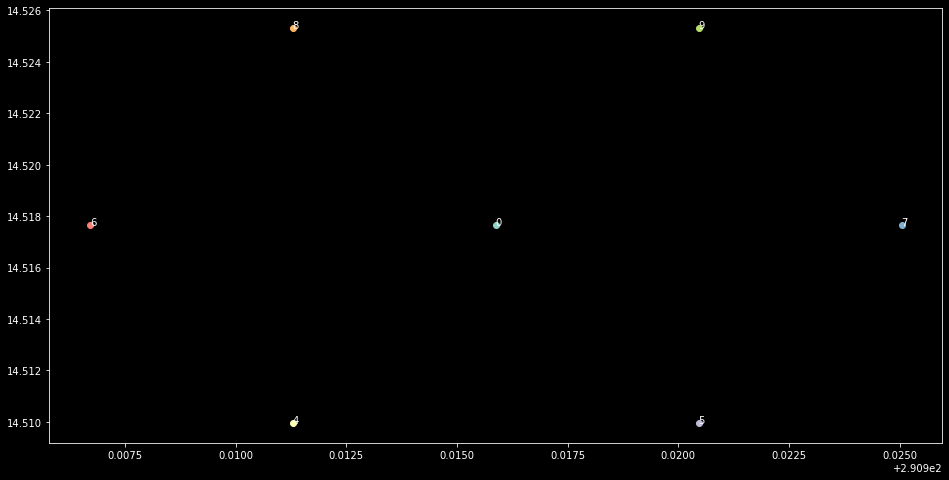

In [36]:
#w51e2 = SkyCoord('19:23:43.939 +14:30:34.472', frame='fk5', unit=(u.hour, u.deg))
ax = pl.gca()
centerfield = []
msmd.open(origmsname)
for fid in msmd.fieldsforname(fieldname):
    if fid in fields_12m:
        crd = msmd.phasecenter(fid)
        field_coord = SkyCoord(crd['m0']['value'], crd['m1']['value'],
                               frame=crd['refer'].lower(),
                               unit=(crd['m0']['unit'], crd['m1']['unit']))
        #sep = w51e2.separation(field_coord)
        ax.scatter(field_coord.ra.deg, field_coord.dec.deg)
        ax.annotate(str(fid), (field_coord.ra.deg, field_coord.dec.deg))
        #print(f"{fid} is separated by {sep.to(u.arcsec):0.1f}")
        #print(f'circle({field_coord.ra.deg}, {field_coord.dec.deg}, 15")')
        #if sep < 10*u.arcsec:
        #    centerfield.append(fid)
        
msmd.close()
#print(centerfield)
centerfield=7

In [37]:
msmd.open(origmsname)
antennae = ",".join([x for x in msmd.antennanames() if 'CM' not in x])
print(antennae)
msmd.close()

DA41,DA42,DA43,DA44,DA45,DA48,DA49,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA60,DA61,DA62,DA63,DA65,DV01,DV02,DV03,DV04,DV05,DV06,DV07,DV08,DV09,DV10,DV11,DV13,DV14,DV15,DV16,DV17,DV19,DV20,DV22,DV23,DV24,DV25,PM01,PM02,PM03,DA64,DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA50,DA51,DA55,DA56,DA57,DA58,DA61,DA62,DV02,DV03,DV07,DV11,DV12,DV14,DV19,DV21,DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA48,DA49,DA50,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA60,DA61,DA62,DA63,DA65,DV01,DV02,DV03,DV04,DV05,DV07,DV08,DV10,DV11,DV12,DV13,DV14,DV15,DV16,DV17,DV19,DV20,DV21,DV22,DV24,DV25,PM01


True

In [38]:
releasepath = f"/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/December2020Release/{fieldname}/{band}/cleanest/"

In [39]:
finaliter = fits.open(f"{releasepath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_selfcal{finalselfcal}_finaliter.image.tt0.pbcor.fits")
ww = wcs.WCS(finaliter[0].header)
print(ww.celestial.pixel_scale_matrix*3600)
pixscale = np.mean(np.abs(wcs.utils.proj_plane_pixel_scales(ww.celestial)*3600))

[[-0.05  0.  ]
 [ 0.    0.05]]


In [40]:
if band == 'B3':
    if pixscale < 0.06:
        imsize=[1800,1800]
    else:
        imsize = [1500,1500]
else:
    # b6 is smaller
    imsize = [1200,1200]

In [41]:
print(imsize)

[1800, 1800]


In [42]:
stdgrdpath = f'imaging_results/{fieldname}_{band}_stdgridder_tests/'
if not os.path.exists(stdgrdpath):
    os.mkdir(stdgrdpath)

In [43]:
releasepath = 'imaging_results' # not reeally a release path...
finalmodelname = [f"{releasepath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_selfcal{finalselfcal}_finaliter.model.tt0",
                  f"{releasepath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_selfcal{finalselfcal}_finaliter.model.tt1"]
finalpbname = f"{releasepath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_selfcal{finalselfcal}_finaliter.pb.tt0"
outname_tt0 = f"{stdgrdpath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_selfcal{finalselfcal}_finaliter.model.tt0.pbcor"
outname_tt1 = f"{stdgrdpath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_selfcal{finalselfcal}_finaliter.model.tt1.pbcor"

try:
    finalmodel_pbcor = immath(imagename=[finalmodelname[1], finalpbname], expr='IM0/IM1', outfile=outname_tt1)
except Exception as ex:
    print(ex)
try:
    finalmodel_pbcor = immath(imagename=[finalmodelname[0], finalpbname], expr='IM0/IM1', outfile=outname_tt0)
except Exception as ex:
    print(ex)

In [44]:
for field in fields_12m:
    imagename_standard = f"{stdgrdpath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}"
    if os.path.exists(imagename_standard+".image.tt0"):
        if not os.path.exists(f"{imagename_standard}.dirty.image.tt0"):
            os.system(f"rm -r {imagename_standard}.*")
        else:
            print(f"Skipped field {field}")
            continue
    tclean(vis=msname,
           selectdata=True,
           field=str(field),
           spw="",
           timerange="",
           uvrange="",
           antenna=antennae,
           scan="",
           observation="",
           intent="",
           datacolumn="corrected",
           imagename=imagename_standard,
           imsize=imsize,
           cell=[f'{pixscale}arcsec', f'{pixscale}arcsec'],
           stokes="I",projection="SIN",
           nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
           gridder="standard",
           deconvolver="mtmfs",
           scales=[0, 3, 9],
           nterms=2,
           smallscalebias=0.6,
           restoration=True,
           pbcor=True,
           weighting="briggs",
           robust=0,
           niter=0,
           verbose=False,
           restart=True,
           savemodel="none",
           calcres=True,
           calcpsf=True,
           parallel=False)
    os.system(f"rm -r {imagename_standard}.model.*")
    os.system(f"rm -r {imagename_standard}.residual.*")

    imregrid(imagename=finalmodelname[0]+".pbcor", template=imagename_standard+".pb.tt0", output=imagename_standard+"_finalmodel_proj_std.model.tt0.pbcor")
    imregrid(imagename=finalmodelname[1]+".pbcor", template=imagename_standard+".pb.tt0", output=imagename_standard+"_finalmodel_proj_std.model.tt1.pbcor")
    immath(imagename=[imagename_standard+".pb.tt0", imagename_standard+"_finalmodel_proj_std.model.tt0.pbcor", ],           
           expr="IM0 * IM1",
           outfile=imagename_standard+".model.tt0",
           imagemd=imagename_standard+".image.tt0")
    immath(imagename=[imagename_standard+".pb.tt0", imagename_standard+"_finalmodel_proj_std.model.tt1.pbcor", ],
           expr="IM0 * IM1",
           outfile=imagename_standard+".model.tt1",
           imagemd=imagename_standard+".image.tt1")
    for fn in [f"{imagename_standard}.image.tt{ii}" for ii in range(2)]:
        shutil.move(fn, fn.replace(".image", ".dirty.image"))

    tclean(vis=msname,
           selectdata=True,
           field=str(field),
           spw="",
           timerange="",
           uvrange="",
           antenna=antennae,
           scan="",
           observation="",
           intent="",
           datacolumn="corrected",
           imagename=imagename_standard,
           imsize=imsize,
           cell=[f'{pixscale}arcsec', f'{pixscale}arcsec'],
           stokes="I",projection="SIN",
           nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
           gridder="standard",
           deconvolver="mtmfs",
           scales=[0, 3, 9],
           nterms=2,
           smallscalebias=0.6,
           restoration=True,
           pbcor=True,
           weighting="briggs",
           robust=0,
           niter=0,
           verbose=False,
           restart=True,
           savemodel="none",
           calcres=True,
           calcpsf=True,
           parallel=False)

In [45]:
field=7

In [46]:
imagename_standard = f"{stdgrdpath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}"

In [47]:
ls -d $imagename_standard*

imaging_results/W51-IRS2_B3_stdgridder_tests//W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field7.alpha/
imaging_results/W51-IRS2_B3_stdgridder_tests//W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field7.alpha.error/
imaging_results/W51-IRS2_B3_stdgridder_tests//W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field7.alpha.pbcor/
imaging_results/W51-IRS2_B3_stdgridder_tests//W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field7.dirty.image.tt0/
imaging_results/W51-IRS2_B3_stdgridder_tests//W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field7.dirty.image.tt1/
imaging_results/W51-IRS2_B3_stdgridder_tests//W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field7_finalmodel_proj_std.m

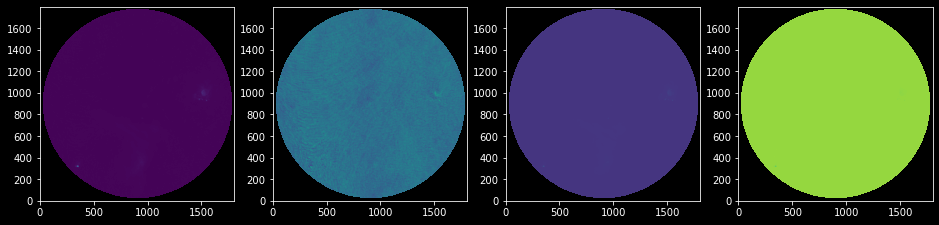

In [48]:
fid = 7
imagename_standard = f"{stdgrdpath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{fid}"

img = SpectralCube.read(imagename_standard+".image.tt0.pbcor", format='casa_image')    
model = SpectralCube.read(imagename_standard+".model.tt0", format='casa_image')
repmod = SpectralCube.read(f'{stdgrdpath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{fid}_finalmodel_proj_std.model.tt0.pbcor', format='casa_image')

residual = SpectralCube.read(imagename_standard+".residual.tt0", format='casa_image')
pb = SpectralCube.read(imagename_standard+".pb.tt0", format='casa_image')

pl.subplot(1,4,1).imshow(img[0].value)
pl.subplot(1,4,2).imshow(residual[0].value)
pl.subplot(1,4,3).imshow(model[0].value)
pl.subplot(1,4,4).imshow(model[0].value - repmod[0].value)

In [49]:
finaliterim = SpectralCube.read(f"{releasepath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_selfcal{finalselfcal}_finaliter.image.tt0.pbcor", format='casa_image')

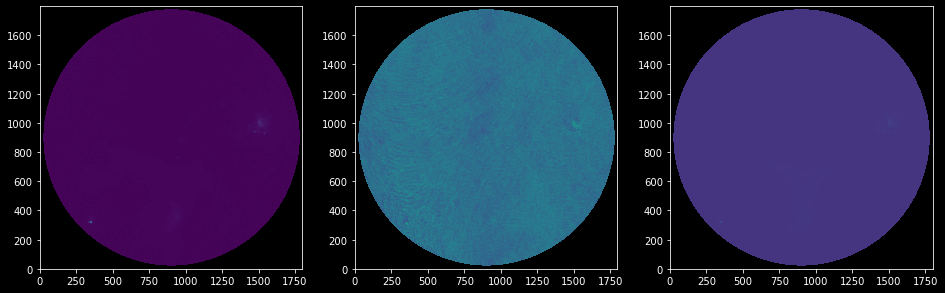

In [50]:
imagename_standard = f"{stdgrdpath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{fid}"

img = SpectralCube.read(imagename_standard+".image.tt0.pbcor", format='casa_image')    
model = SpectralCube.read(imagename_standard+".model.tt0", format='casa_image')    
residual = SpectralCube.read(imagename_standard+".residual.tt0", format='casa_image')    

pl.subplot(1,3,1).imshow(img[0].value)
pl.subplot(1,3,2).imshow(residual[0].value)
pl.subplot(1,3,3).imshow(model[0].value)

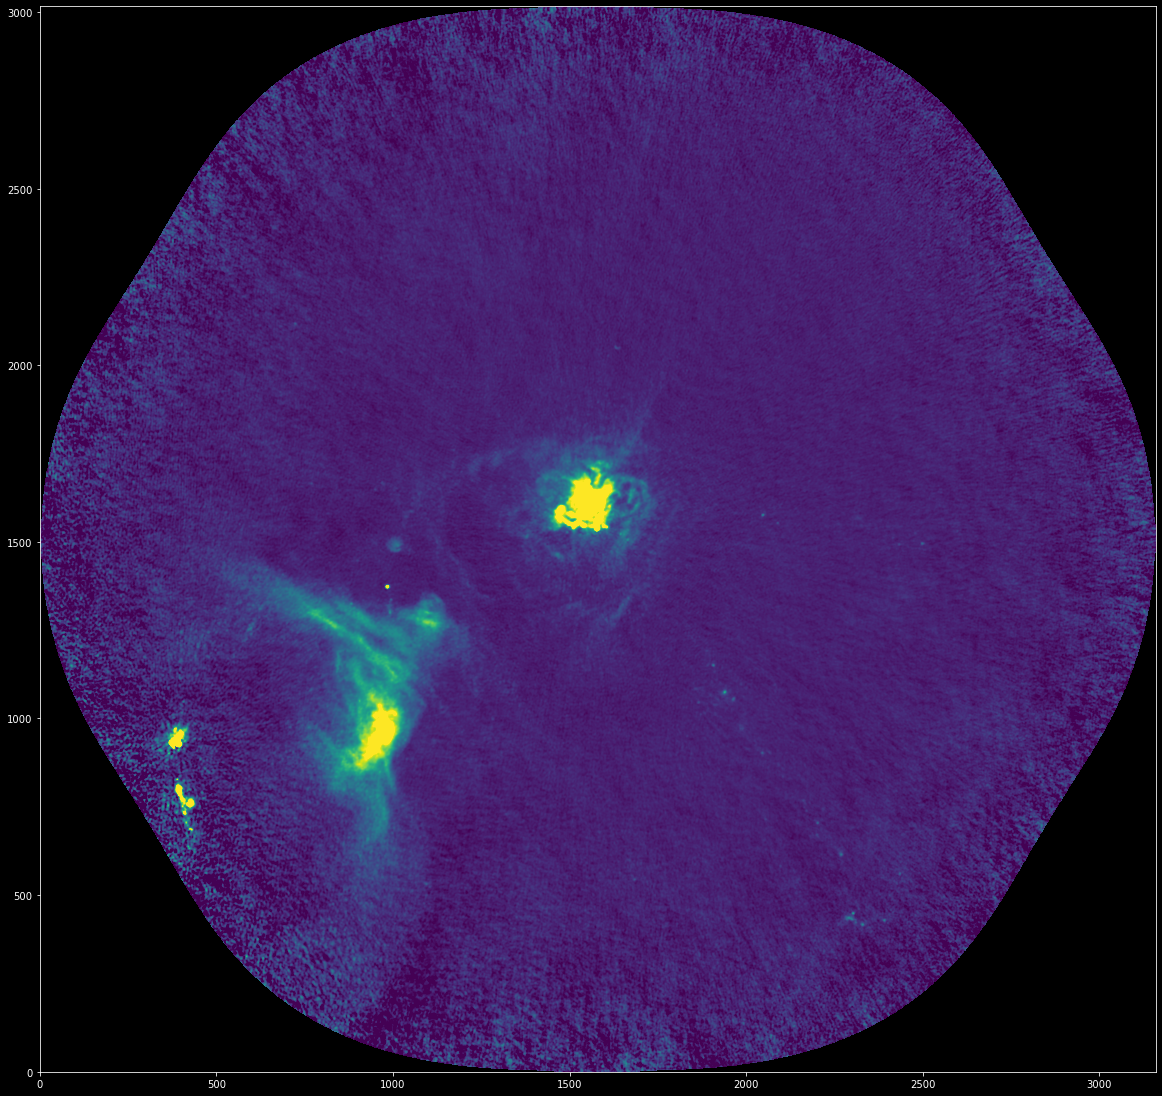

In [51]:
pl.figure(figsize=(20,20))
pl.imshow(finaliterim.minimal_subcube()[0].value, vmax=0.005, vmin=-0.0005)

In [52]:
def show(imagename_standard):
    #img = SpectralCube.read(imagename_standard+".image", format='casa_image')    
    #model = SpectralCube.read(imagename_standard+".model", format='casa_image')    
    #residual = SpectralCube.read(imagename_standard+".residual", format='casa_image')    
    #pb = SpectralCube.read(imagename_standard+".pb", format='casa_image')    


    pl.figure(figsize=(16,5))

    img = SpectralCube.read(imagename_standard+".image.tt0", format='casa_image')
    dirtyimg = SpectralCube.read(imagename_standard+".dirty.image.tt0", format='casa_image')
    resid = SpectralCube.read(imagename_standard+".residual.tt0", format='casa_image')
    model = SpectralCube.read(imagename_standard+".model.tt0", format='casa_image')

    reprj = finaliterim[0].reproject(img[0].header)
    diff[field] = (reprj.value-img[0].value)
    pb = SpectralCube.read(imagename_standard+".pb.tt0", format='casa_image')    

    norm = simple_norm(dirtyimg[0].value, min_percent=1, max_percent=99.9, stretch='asinh')
    pl.subplot(1,5,1).imshow(dirtyimg[0].value, norm=norm)
    pl.contour(pb[0].value, levels=[0.2,0.5], colors=['w']*2)
    pl.title("Dirty Image (std)")
    pl.xticks([]); pl.yticks([])
    pl.subplot(1,5,2).imshow(img[0].value, norm=norm)
    pl.contour(pb[0].value, levels=[0.2,0.5], colors=['w']*2)
    pl.title("Image (standard)")
    pl.xticks([]); pl.yticks([])
    pl.subplot(1,5,3).imshow(resid[0].value, norm=norm)
    pl.contour(pb[0].value, levels=[0.2,0.5], colors=['w']*2)
    pl.title("Residual")
    reprj = finaliterim[0].reproject(img[0].header)
    pl.contour(pb[0].value, levels=[0.2,0.5], colors=['w']*2)
    pl.xticks([]); pl.yticks([])
    pl.subplot(1,5,4).imshow(reprj.value, norm=norm)
    pl.title("Mosaic image regrid")
    pl.contour(pb[0].value, levels=[0.2,0.5], colors=['w']*2)
    pl.suptitle(field)
    pl.xticks([]); pl.yticks([])
    
    ax = pl.subplot(1,5,5)
    im = ax.imshow(model[0].value, norm=simple_norm(model[0].value, max_percent=99.995, min_percent=1, stretch='log'))
    #pl.contour(pb[0].value, levels=[0.2, 0.5], colors=['w']*2)
    #pl.colorbar(mappable=im)
    pl.xticks([]); pl.yticks([])
    pl.title("Model")

In [ ]:
diff = {}

for field in fields_12m:
    imagename_standard = f"{stdgrdpath}/{fieldname}_{band}_uid___A001_X1296_{uid}_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}"
    show(imagename_standard)